In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 
import numpy as np
import pickle
import imageio.v2 as imageio

from birdseye import BirdsEye
from lanefilter import LaneFilter
from curves import Curves
from helpers import show_images, save_image, roi

In [4]:
calibration_data = pickle.load(open("calibration_data.p", "rb" ))

matrix = calibration_data['camera_matrix']
dist_coef = calibration_data['distortion_coefficient']

source_points = [(580, 460), (205, 720), (1110, 720), (703, 460)]
dest_points = [(320, 0), (320, 720), (960, 720), (960, 0)]

p = { 'sat_thresh': 120, 'light_thresh': 40, 'light_thresh_agr': 205,
      'grad_thresh': (0.7, 1.4), 'mag_thresh': 40, 'x_thresh': 20 }

birdsEye = BirdsEye(source_points, dest_points, matrix, dist_coef)
laneFilter = LaneFilter(p)
curves = Curves(number_of_windows = 9, margin = 100, minimum_pixels = 50, 
                ym_per_pix = 30 / 720 , xm_per_pix = 3.7 / 700)

In [7]:
def curve_test(path):
  img = imageio.imread(path)
  binary = laneFilter.apply(img)
  wb = np.logical_and(birdsEye.sky_view(binary), roi(binary)).astype(np.uint8)
  result = curves.fit(wb)
  print("[real world] left best-fit curve parameters:", result['real_left_best_fit_curve'])
  print("[real world] right best-fit curve parameters:", result['real_right_best_fit_curve'])
  print("[pixel] left best-fit curve parameters:", result['pixel_left_best_fit_curve'])
  print("[pixel] left best-fit curve parameters:", result['pixel_right_best_fit_curve'])
  print("[left] current radius of curvature:", result['left_radius'], "m")
  print("[right] current radius of curvature:", result['right_radius'], "m")
  print("vehicle position:", result['vehicle_position_words'])
  plt.imshow(result['image'])

[real world] left best-fit curve parameters: [ 4.68567498e-04 -2.61879574e-02  2.19431869e+00]
[real world] right best-fit curve parameters: [ 2.37038169e-04 -2.50823064e-02  5.73248022e+00]
[pixel] left best-fit curve parameters: [ 1.53902613e-04 -2.06436601e-01  4.15141373e+02]
[pixel] left best-fit curve parameters: [ 7.78560054e-05 -1.97720884e-01  1.08452328e+03]
[left] current radius of curvature: 1067.0880589855942 m
[right] current radius of curvature: 2109.738100980384 m
vehicle position: 0.13 m right of center


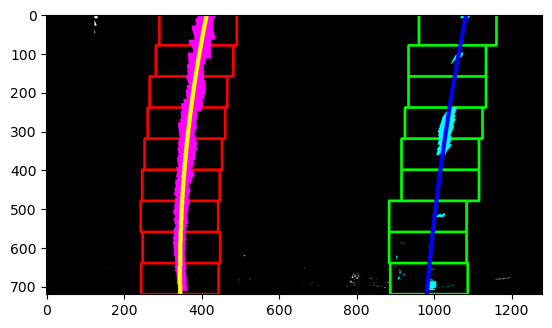

In [8]:
curve_test("test_images/test1.jpg")

[real world] left best-fit curve parameters: [-7.02114020e-04  3.97765732e-02  1.44017797e+00]
[real world] right best-fit curve parameters: [-1.51996477e-04  2.62856822e-02  4.81262927e+00]
[pixel] left best-fit curve parameters: [-2.30611775e-04  3.13554068e-01  2.72466102e+02]
[pixel] left best-fit curve parameters: [-4.99237677e-05  2.07206954e-01  9.10497430e+02]
[left] current radius of curvature: 712.1409468642976 m
[right] current radius of curvature: 3291.0040247898964 m
vehicle position: 0.35 m right of center


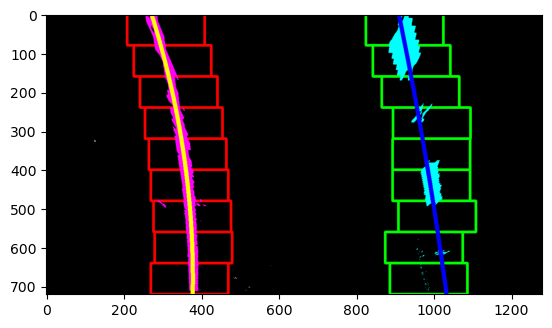

In [9]:
curve_test("test_images/test2.jpg")

[real world] left best-fit curve parameters: [ 3.88347451e-04 -3.78982629e-02  2.58001454e+00]
[real world] right best-fit curve parameters: [ 4.53502052e-04 -3.42454112e-02  5.81137293e+00]
[pixel] left best-fit curve parameters: [ 1.27554061e-04 -2.98747568e-01  4.88110859e+02]
[pixel] left best-fit curve parameters: [ 1.48954315e-04 -2.69952566e-01  1.09944893e+03]
[left] current radius of curvature: 1287.918385016301 m
[right] current radius of curvature: 1102.6126994298252 m
vehicle position: 0.11 m right of center


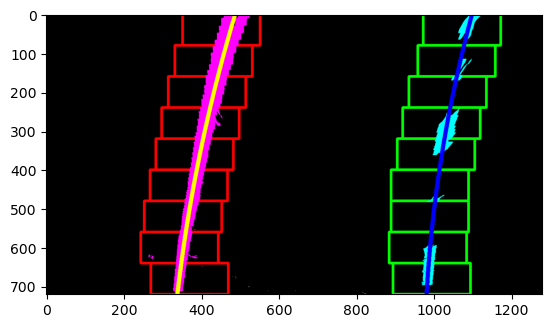

In [10]:
curve_test("test_images/test3.jpg")

[real world] left best-fit curve parameters: [ 3.33022440e-04 -1.82659201e-02  2.17934762e+00]
[real world] right best-fit curve parameters: [ 8.58865755e-04 -3.90634079e-02  5.81322996e+00]
[pixel] left best-fit curve parameters: [ 1.09382371e-04 -1.43988109e-01  4.12309010e+02]
[pixel] left best-fit curve parameters: [ 2.82097423e-04 -3.07932270e-01  1.09980026e+03]
[left] current radius of curvature: 1501.4069510976194 m
[right] current radius of curvature: 582.2989218266798 m
vehicle position: 0.29 m right of center


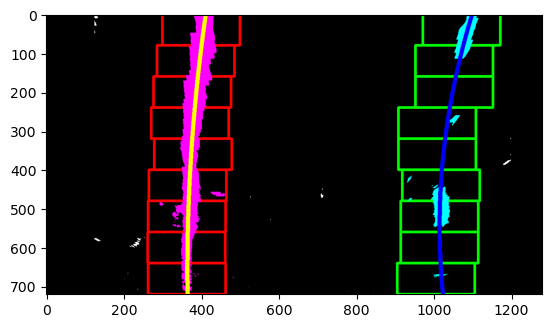

In [11]:
curve_test("test_images/test4.jpg")

[real world] left best-fit curve parameters: [ 7.31552375e-04 -4.14797348e-02  2.15356924e+00]
[real world] right best-fit curve parameters: [ 3.81290902e-04 -2.92450110e-02  5.71812881e+00]
[pixel] left best-fit curve parameters: [ 2.40280904e-04 -3.26979891e-01  4.07432018e+02]
[pixel] left best-fit curve parameters: [ 1.25236314e-04 -2.30534997e-01  1.08180815e+03]
[left] current radius of curvature: 683.4840341401791 m
[right] current radius of curvature: 1311.4144780382246 m
vehicle position: 0.01 m left of center


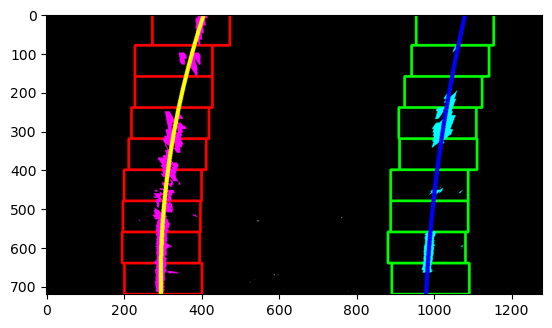

In [12]:
curve_test("test_images/test5.jpg")

[real world] left best-fit curve parameters: [ 4.07619638e-04 -3.94705586e-02  2.69252793e+00]
[real world] right best-fit curve parameters: [ 9.99777706e-04 -4.85624756e-02  6.02875317e+00]
[pixel] left best-fit curve parameters: [ 1.33884078e-04 -3.11141791e-01  5.09397177e+02]
[pixel] left best-fit curve parameters: [ 3.28380440e-04 -3.82812308e-01  1.14057492e+03]
[left] current radius of curvature: 1227.04848957369 m
[right] current radius of curvature: 500.2090807214521 m
vehicle position: 0.29 m right of center


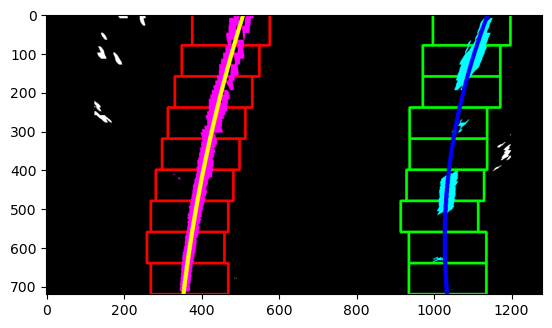

In [13]:
curve_test("test_images/test6.jpg")

[real world] left best-fit curve parameters: [ -1.62054436e-04   4.31245011e-03   1.71104116e+00]
[real world] right best-fit curve parameters: [  1.45790386e-04  -3.29495738e-03   5.03763237e+00]
[pixel] left best-fit curve parameters: [ -5.32273392e-05   3.39945391e-02   3.23710490e+02]
[pixel] left best-fit curve parameters: [  4.78853559e-05  -2.59737632e-02   9.53065583e+02]
[left] current radius of curvature: 3085.51848009 m
[right] current radius of curvature: 3429.73435532 m
vehicle position: 0.0 m left of center


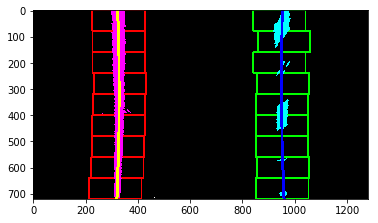

In [10]:
curve_test("test_images/straight_lines1.jpg")

[real world] left best-fit curve parameters: [  1.64554188e-04  -4.59339191e-03   1.73918011e+00]
[real world] right best-fit curve parameters: [ -2.26645751e-05  -1.96955590e-03   5.13256373e+00]
[pixel] left best-fit curve parameters: [  5.40483913e-05  -3.62091705e-02   3.29034074e+02]
[pixel] left best-fit curve parameters: [ -7.44425795e-06  -1.55257785e-02   9.71025571e+02]
[left] current radius of curvature: 3038.63982034 m
[right] current radius of curvature: 22061.2260569 m
vehicle position: 0.02 m right of center


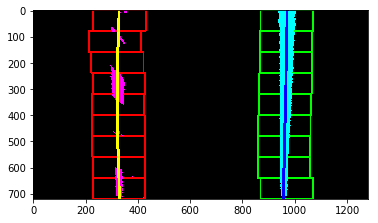

In [11]:
curve_test("test_images/straight_lines2.jpg")